In [2]:
import networkx as nx #---> Library for network analysis
import matplotlib.pyplot as plt #---> Library for creating plots
import matplotlib.colors as mcolors #---> Library for setting colors of the plots
import numpy as np #---> Library for efficiently operating with arrays/matrices/vectors
import pandas as pd #---> Library for analysing dataframes
import seaborn as sns #---> Library forcreating plots
import random #---> Library for generating random numbers/distributions
from pylab import rcParams #---> Library for set the attributes of the figures
import collections
import powerlaw

#Magic functions (%) for setting up the matplotlib and increase the resolution of the plots:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
pip install decorator


Note: you may need to restart the kernel to use updated packages.


Name: 
Type: Graph
Number of nodes: 410
Number of edges: 2765
Average degree:  13.4878


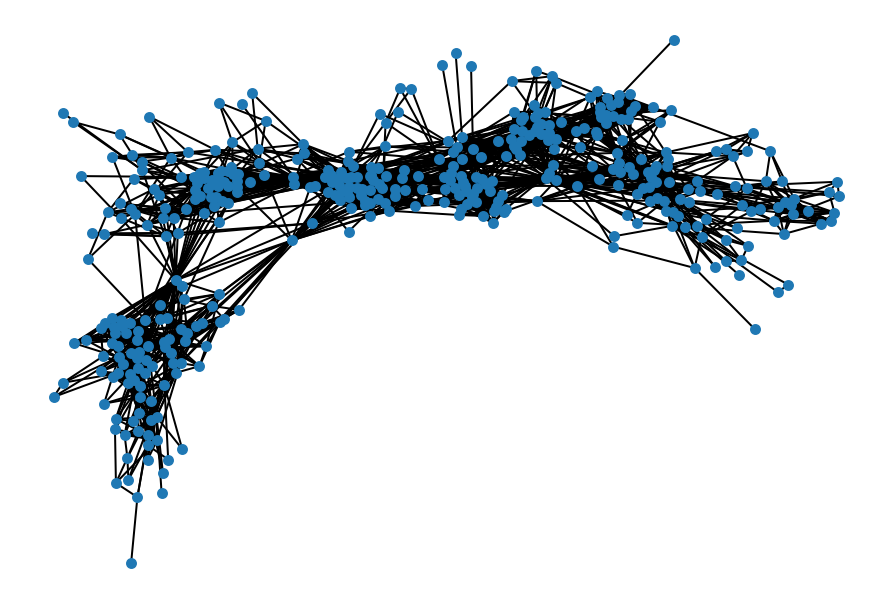

In [4]:
#Q1.1
fh=open("infect-dublin.edges", 'r')
Gx=nx.read_edgelist(fh, nodetype=int,data=(('type',int),('id',int)) ,create_using=nx.Graph())
#Gx.adj
#print(nx.adjacency_matrix(Gx)) #---> Check the numpy array with the adjacency network with values different to 0
#This network is unweighted then all the next values are 1
print(nx.info(Gx))
nx.draw_spring(Gx,node_size=20)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Text(0, 0.5, 'node idx')

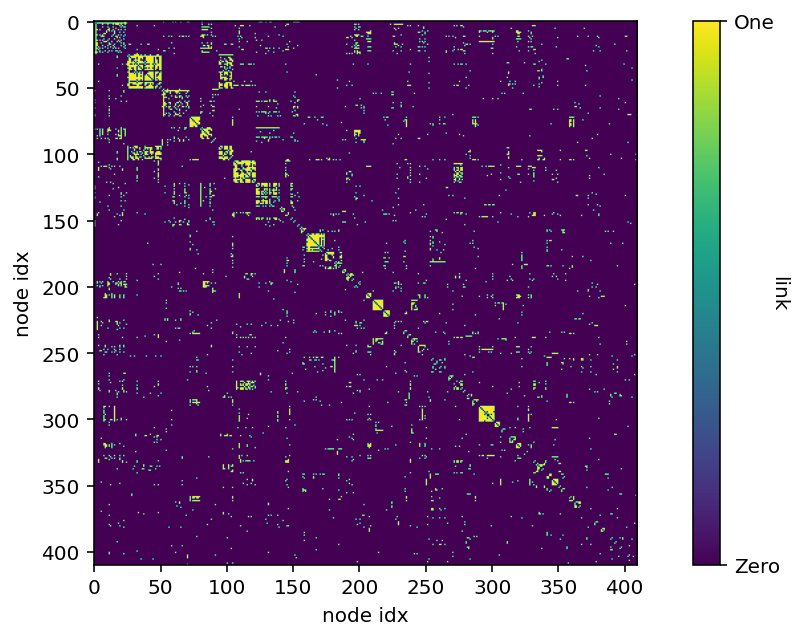

In [12]:
#q1/.2
print(nx.to_numpy_matrix(Gx)) #--> visualize the entire adjacency matrix
plt.imshow(nx.to_numpy_matrix(Gx)) #--> This function create a heatmaps from 2-dimensional numpy arrays.
cbar = plt.colorbar() #--> set the colorbar of the heatmap
cbar.set_ticks([0,1]) #--> set the range of the color bar
cbar.ax.set_yticklabels(['Zero','One'],) #--> set the label of the number to display in the color bar

cbar.set_label('link', rotation=270) #--> set the label of the color bar and rotate it
plt.xlabel('node idx') #--> set the label of the x axis
plt.ylabel('node idx') #--> set the label of the y axis

Degree sequence [50, 47, 43, 43, 34, 34, 34, 33, 33, 33, 32, 31, 31, 31, 30, 29, 29, 28, 28, 28, 28, 27, 27, 27, 27, 27, 26, 26, 26, 26, 26, 26, 26, 26, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 21, 21, 21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10,

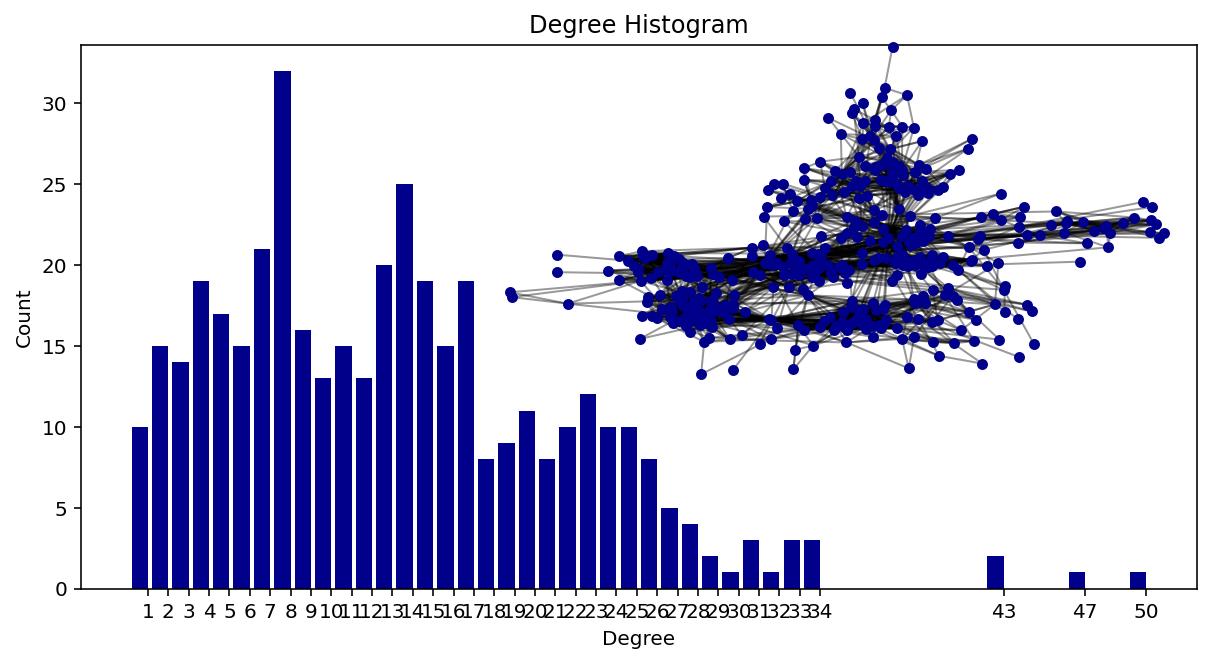

In [13]:
#q1.3


degree_sequence = sorted([d for n, d in Gx.degree()], reverse=True)  #<-- Save the degree of each node 
                                                                    #and order the list from highest to lowest
print("Degree sequence", degree_sequence)

degreeCount = collections.Counter(degree_sequence) #<-- Count the frequency (number of times) of each degree
print("Degree frequencies", degreeCount)

deg, cnt = zip(*degreeCount.items()) #<-- Function that create lists of iterables, 
                                     #one for the degrees and the other one for the frquencies

rcParams['figure.figsize'] = 10, 5 #<-- Set the plot size
fig, ax = plt.subplots() #<-- Create the subplots

plt.bar(deg, cnt, width=0.80, color='darkblue') #<-- Plot a bar plot with the degrees and their frequencies

#Set plot attributes as title, x and y labels, and ticks with frequencies larger than zero
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

#Draw the network inside the barplot
plt.axes([0.4, 0.4, 0.5, 0.5])

#Select the largest connected component of the network:
Gcc = Gx.subgraph(sorted(nx.connected_components(Gx), key=len, reverse=True)[0])

pos = nx.spring_layout(Gx) #<-- Set the layout of the network
plt.axis('off') #<-- Remove the axis of the network plot
nx.draw_networkx_nodes(Gx, pos, node_color= 'darkblue',node_size=20) #<-- Plot the nodes
nx.draw_networkx_edges(Gx, pos, alpha=0.4) #<-- Plot the edges

plt.show()

Calculating best minimal value for power law fit


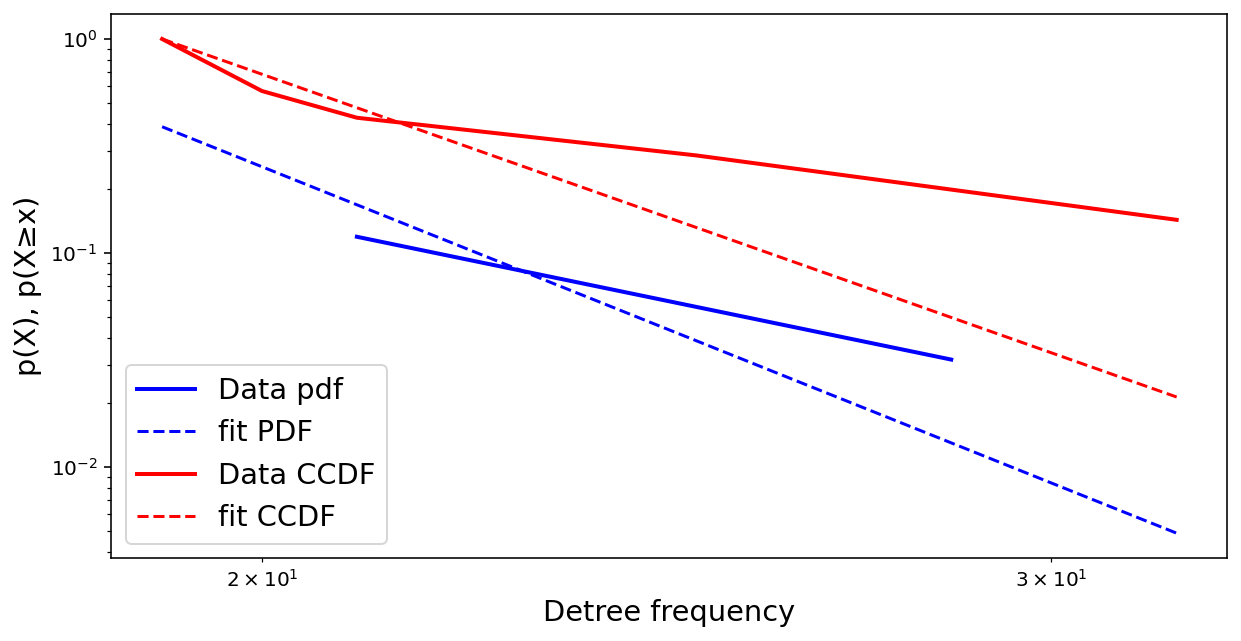

In [15]:
#q1.4
DiR=nx.Graph.to_directed(Gx) #<-- Set the network to a directed onde

degree_sequence = sorted([d for n, d in DiR.out_degree()], reverse=True)  #<-- Save the degree of each node 
                                                                    #and order the list from highest to lowest
degreeCount = collections.Counter(degree_sequence) #<-- Count the frequency (number of times) of each degree
deg, cnt = zip(*degreeCount.items())#<-- Function that create lists of iterables, 
                                     #one for the degrees and the other one for the frquencies
fit = powerlaw.Fit(list(degreeCount.values())) #<-- Fit the data
fig2=fit.plot_pdf(color='b', linewidth=2) #<-- Plot the PDF of the original data

fit.power_law.plot_pdf(color='b', linestyle='dashed', ax=fig2) #<-- Plot the PDF of the power law fit

fit.plot_ccdf(color='r', linewidth=2, ax=fig2) #<-- Plot the PDF of the original data in the same fig

fit.power_law.plot_ccdf(color='r', linestyle='dashed', ax=fig2) #<-- Plot the PDF of the power law fit

plt.legend(['Data pdf', 'fit PDF', 'Data CCDF', 'fit CCDF'], fontsize = 'x-large')

plt.xlabel('Detree frequency', fontsize = 'x-large')
plt.ylabel('p(X), p(X≥x)', fontsize = 'x-large')
plt.show()

In [17]:
r = nx.degree_assortativity_coefficient(Gx)
print(f"{r:3.1f}")
print(r)


0.2
0.2257519475783722


In [18]:
#Q2.1

NodeNotFound: Source 500 is not in G

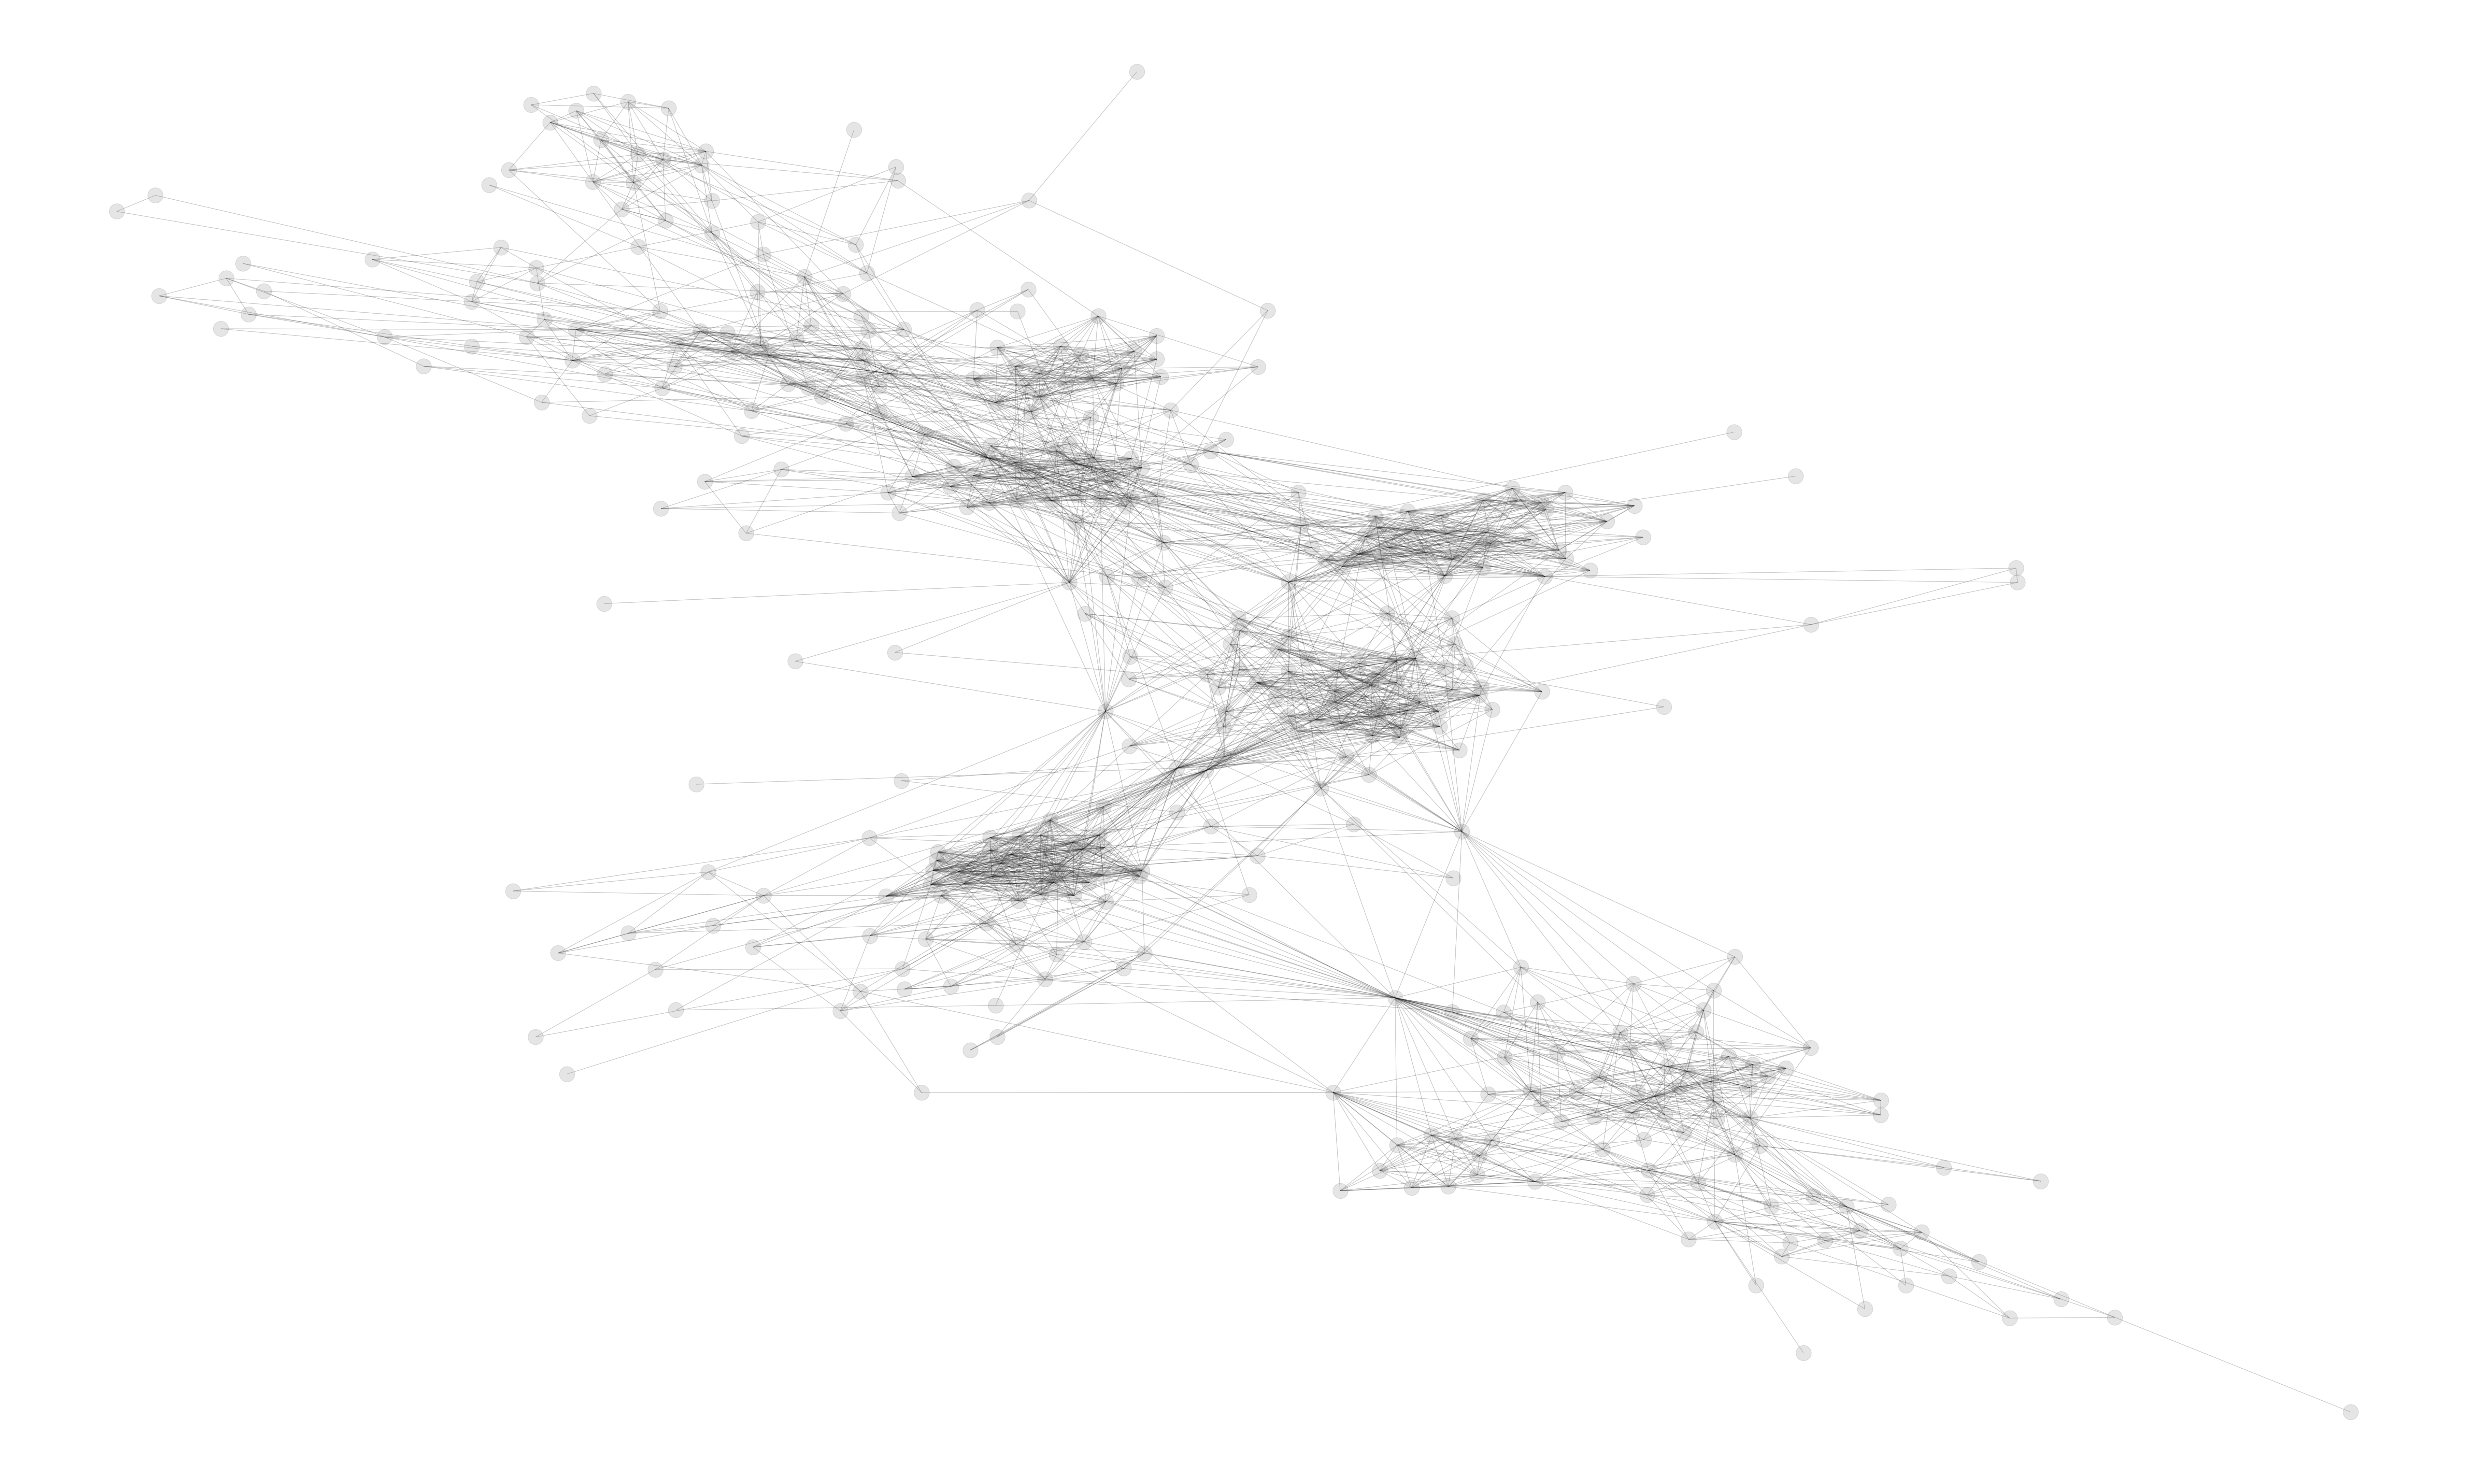

In [26]:
def get_colored_edges(Gx,max_node,d):
   
    path=nx.single_source_shortest_path(Gx, source = max_node, cutoff = d)
    keys=list(path.keys())
    vals=list(path.values())
    edges_list=[]
    color=[]
    edges_list.append((max_node,max_node))
    color.append(0)
    keys.pop(0)
    vals.pop(0)
   
    for i in range(len(keys)):
        c=1
        m=vals[i]
        for j in range(len(m)-1):
            color.append(c)
            edges_list.append((m[j],m[j+1]))
            c+=1
   
    return edges_list,color

def get_colored_nodes(Gx,max_node,d):
   
    #Add a new distance parameter to the graph assign a large value
    nx.set_node_attributes(Gx, np.inf, "distance")
   
    #Find the nodes and edges with distance specified
    paths = nx.single_source_shortest_path_length(Gx, source = max_node, cutoff = d)
   
    #Assign the shortest distances of each node from the max node
    for i, j in paths.items():
        Gx.nodes[i]['distance'] = j
   
    #Create a set with unique distance
    sets = set(nx.get_node_attributes(Gx,'distance').values())
   
    norm = mcolors.Normalize(vmin = 0, vmax = d)
    smp = plt.cm.ScalarMappable(norm=norm, cmap = plt.cm.viridis)
   
    grouping = dict(zip(sorted(sets),Counter()))
    node_list = Gx.nodes()
   
    #find color of each node
    colors = [grouping[Gx.nodes[i]['distance']] for i in node_list]
   
   
    return node_list,colors


def Draw_ego_network(Gx,max_node, d):
   
    plt.figure(figsize = (50,30))
    pos=nx.spring_layout(Gx)
    nx.draw(Gx,pos,node_color='grey',node_size=500,alpha=0.2)
   
    node_list,colors=get_colored_nodes(Gx,max_node,d)
   
    edge_list,color=get_colored_edges(Gx,max_node,d)
   
    norm = mcolors.Normalize(vmin = 0, vmax = d)
    smp = cm.ScalarMappable(norm=norm, cmap = cm.viridis)
    nx.draw_networkx_nodes(Gx, pos, nodelist = node_list, node_color = colors, node_size = 1000, cmap = plt.cm.Set2)
    nx.draw_networkx_edges(Gx,pos,edgelist=edge_list,edge_color=color,width=8,alpha=1.0)
    nx.draw_networkx_nodes(Gx, pos, node_size=2000, node_color=0, nodelist=[max_node])
    cbar = plt.colorbar(smp, )
    cbar.set_ticks(range(0, d+1))
    cbar.set_ticklabels(range(0, d+1))
    plt.axis('off')
    plt.show()
       
Draw_ego_network(Gx,500,3)

G (a Network as networkx)
• initial_infected (nodes that are infected at time=0 as list of nodes ID)
• beta (trasmission probability as float)
• t_simulation (simulation iteration time as int)
• recovery_time (nodes that are vaccinated as list of nodes ID)
• the number of days needed for the recovery

In [ ]:
#3.1

def SI_model(G,initial_infected,beta,t_simulation):
    ds=-beta*(initial_infected/G)
    
    

G (a Network as networkx)
• initial_infected (nodes that are infected at time=0 as list of nodes ID)
• beta (trasmission probability as float)
• t_simulation (simulation iteration time as int)
• recovery_time (the number of days needed for the recovery.)
• nodes that are vaccinated as list of nodes ID.
Output: a dictionary that contains the nodes status at each time steps. In this case the status can be:
• ’S’ as susceptible.
• ’I’ as Infected.
• ’R’ as Recovered.

In [203]:
def SIR_model(A,initial_infected,beta,t_simulation,recovery_time,vaccinated):
    # init params
    #nitInfected = modelParams.get('initInfected', None)
    #p = modelParams.get('probInfect', 0.5)
    #upd = modelParams.get('updateInfection', True)
    #maxRecTime = modelParams.get('t2Recover', 2)
    
    # init output
    nx.set_node_attributes(A, 'S', "Status")
    
    #print(A.shape)
    #n = A.shape[0]
    A_list=list(A.nodes)
    n=len(A_list)
    #print(sorted(A_list))
    states = np.zeros([n+1, t_simulation+1]) # 1 = infected, 0 = susceptable
    sta=np.zeros([n+1, t_simulation+1])
    recovery = np.zeros(n+1,)
    print(recovery.shape)
    # set initially infected nodes
 

    if initial_infected is None:
        initial_infected = np.random.choice(range(n), 3)
        states[initial_infected,0] = 1
    else:
        states[initial_infected,0] = 1
    #print(states[])
    for i in initial_infected:
        A.nodes[i]['Status'] = 'I'
        
    recovery[initial_infected] = recovery_time + 1
    mylis=[]
    reco=np.array(mylis)
    # Start simulation
    for t in range(1, t_simulation+1):
        
        if 1 in recovery:
            a=np.where(recovery==1)
            #
            reco=np.append(reco,a)
            print('raj',len(reco))
        #print(t,reco)
        #for i in reco:
        #    A.nodes[i]['States']='R'
        
        
            
        recovery = np.maximum(recovery-1,0)
        #print(recovery)
        #print(recTime)
        states[recovery>0, t] = 1
        #print(states,'raj')
        states[recovery==0, t] = 0
        #print(states,'raja')
        for i in reco:
            #print(i)
            states[int(i), t] = -1
        #curInf = np.nonzero(states[:,t])[0]
        #print(curInf)
        curInf=np.where(states[:,t]>0) 
        l=np.array(curInf).tolist()
        #print(np.array(curInf).tolist())
        l=sum(l, [])
        states[curInf, t] = 1
        #print(states,'raa')
        for i in l:
            
            #NN = np.setdiff1d(np.nonzero(A[i,])[0], curInf)
            NN=list(nx.all_neighbors(A,i))
            #NN = np.nonzero(A[i,])[0]
            #print(NN,'rsghash')
            infNN = [n for n in NN if np.random.uniform(0,1)<beta]
            for i in infNN:
                if recovery[i]==0 and i not in reco:
                    
                    states[i, t] = 1
                    recovery[i] = recovery_time + 1
                elif i in reco:
                    states[i, t] = -1
                
            
                
           
    Ra=np.where(states<0,'R',(np.where(states>0,'I','S')))
    #Ra[states<=0]='R'
    #Ra[states>0]='I'
    #Ra[states==0]='S'
    #print(np.where(Ra=='R'))
    final={}
   
    for i in range(0, t_simulation+1):
        final[i]=Ra[:,i]
        
    #print(states[:,0])
    return final
bab=SIR_model(Gx,[1,3,5],0.01,300,15,None)    

(411,)
raj 3
raj 4
raj 6
raj 7
raj 11
raj 13
raj 15
raj 17
raj 21
raj 23
raj 26
raj 28
raj 29
raj 35
raj 41
raj 44
raj 47
raj 52
raj 61
raj 66
raj 69
raj 79
raj 89
raj 101
raj 109
raj 117
raj 123
raj 128
raj 137
raj 141
raj 152
raj 157
raj 163
raj 172
raj 181
raj 188
raj 195
raj 201
raj 204
raj 210
raj 217
raj 223
raj 225
raj 230
raj 235
raj 240
raj 242
raj 245
raj 253
raj 258
raj 264
raj 267
raj 269
raj 270
raj 273
raj 275
raj 277
raj 278
raj 279
raj 280
raj 282
raj 283
raj 285
raj 287
raj 288
raj 289
raj 290
raj 291
raj 292
raj 293
raj 294
raj 295


In [204]:
recoverdlist=[]
infectedlist=[]
suspectedlist=[]
for i in (bab.keys()):
    a=np. count_nonzero(bab[i] == "R")
    b=np. count_nonzero(bab[i] == "S")
    c=np. count_nonzero(bab[i] == "I")
    recoverdlist.append(a)
    infectedlist.append(c)
    suspectedlist.append(b)
print(suspectedlist)
#plt.plot(len(bab.values),bab.values())

[408, 407, 407, 405, 404, 400, 398, 396, 394, 390, 388, 385, 383, 382, 376, 370, 367, 364, 359, 350, 345, 342, 332, 322, 310, 302, 294, 288, 283, 274, 270, 259, 254, 248, 239, 230, 223, 216, 210, 207, 201, 194, 188, 186, 181, 176, 171, 169, 166, 158, 153, 147, 144, 144, 142, 141, 138, 138, 136, 134, 133, 132, 132, 131, 129, 128, 126, 124, 124, 124, 123, 122, 122, 122, 122, 122, 122, 122, 121, 121, 120, 119, 118, 117, 117, 117, 117, 117, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116,

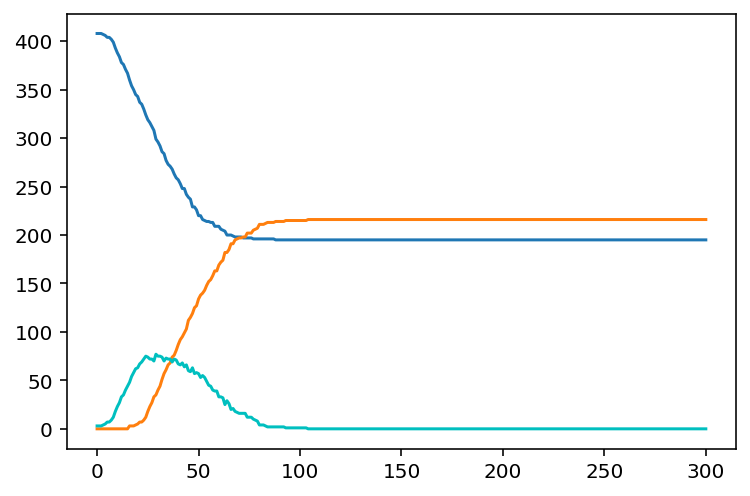

In [192]:
plt.plot(range(len(suspectedlist)),suspectedlist)
plt.plot(range(len(suspectedlist)),recoverdlist)
plt.plot(range(len(suspectedlist)),infectedlist,"c")
plt.show()

In [202]:
def SI_model(A,initial_infected,beta,t_simulation):
    
    # init output
    nx.set_node_attributes(A, 'S', "Status")
    
    A_list=list(A.nodes)
    n=len(A_list)
    
    states = np.zeros([n+1, t_simulation+1]) # 1 = infected, 0 = susceptable
    sta=np.zeros([n+1, t_simulation+1])
    Infected = np.zeros(n+1,)
    
    if initial_infected is None:
        initial_infected = np.random.choice(range(n), 3)
        states[initial_infected,0] = 1
    else:
        states[initial_infected,0] = 1
    
    for i in initial_infected:
        A.nodes[i]['Status'] = 'I'
        
    Infected[initial_infected] = 1
    mylis=[]
    reco=np.array(mylis)
    # Start simulation
    for t in range(1, t_simulation+1):
        
        
        states[Infected>0, t] = 1
        states[Infected==0, t] = 0
        
        curInf = np.nonzero(states[:,t])[0]
        states[curInf, t] = 1
        for i in curInf:
            
            NN=list(nx.all_neighbors(A,i))
            infNN = [n for n in NN if np.random.uniform(0,1)<beta]
            for i in infNN:
                states[i, t] = 1
                Infected[i] =  1
                              
            
                
           
    Ra=np.where(states>0,"I","S")
    final={}
   
    for i in range(0, t_simulation+1):
        final[i]=Ra[:,i]
    return final
bab2=SI_model(Gx,[1,3,5],0.01,300)    

In [210]:
suspectedlist2=[]
infectedlist2=[]

for i in (bab2.keys()):
    
    b=np. count_nonzero(bab[i] == "S")
    c=np. count_nonzero(bab[i] == "I")
    
   
    infectedlist2.append(c)
    suspectedlist2.append(b)
print(suspectedlist2)    

[408, 407, 407, 405, 404, 400, 398, 396, 394, 390, 388, 385, 383, 382, 376, 370, 367, 364, 359, 350, 345, 342, 332, 322, 310, 302, 294, 288, 283, 274, 270, 259, 254, 248, 239, 230, 223, 216, 210, 207, 201, 194, 188, 186, 181, 176, 171, 169, 166, 158, 153, 147, 144, 144, 142, 141, 138, 138, 136, 134, 133, 132, 132, 131, 129, 128, 126, 124, 124, 124, 123, 122, 122, 122, 122, 122, 122, 122, 121, 121, 120, 119, 118, 117, 117, 117, 117, 117, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116,

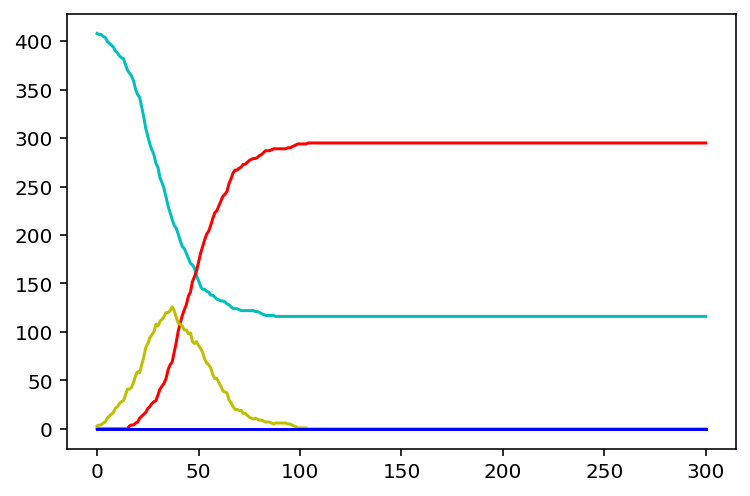

In [220]:
plt.plot(range(len(suspectedlist)),suspectedlist,"c")
plt.plot(range(len(suspectedlist)),recoverdlist,"r")
plt.plot(range(len(suspectedlist)),infectedlist,"y")
plt.plot(range(len(suspectedlist)),Secondwave,"b")
plt.show()

In [221]:
def SISW_model(A,initial_infected,beta,t_simulation,recovery_time,vaccinated):
    
    # init output
    nx.set_node_attributes(A, 'S', "Status")
    
    A_list=list(A.nodes)
    n=len(A_list)
    #print(sorted(A_list))
    states = np.zeros([n+1, t_simulation+1]) # 1 = infected, 0 = susceptable
    recovery = np.zeros(n+1,)
    print(recovery.shape)
    # set initially infected nodes
 

    if initial_infected is None:
        initial_infected = np.random.choice(range(n), 3)
        states[initial_infected,0] = 1
    else:
        states[initial_infected,0] = 1
    #print(states[])
    for i in initial_infected:
        A.nodes[i]['Status'] = 'I'
        
    recovery[initial_infected] = recovery_time + 1
    mylis=[]
    reco=np.array(mylis)
    sw=np.array(mylis)
    # Start simulation
    for t in range(1, t_simulation+1):
        if t==101:
            print("second wave ")
            lis2= [x for x in A_list if x not in reco]
            Second_infected = np.random.choice(lis2, 30)
            recovery[Second_infected] = recovery_time + 1
            sw=np.append(sw,Second_infected)
        if 1 in recovery:
            a=np.where(recovery==1)
            #
            reco=np.append(reco,a)
            print('raj',len(reco))
        #print(t,reco)
        #for i in reco:
        #    A.nodes[i]['States']='R'
        
        
            
        recovery = np.maximum(recovery-1,0)
        #print(recovery)
        #print(recTime)
        states[recovery>0, t] = 1
        #print(states,'raj')
        states[recovery==0, t] = 0
        #print(states,'raja')
        for i in reco:
            #print(i)
            states[int(i), t] = -1
        for i in sw:
            states[int(i), t] = 2
        #curInf = np.nonzero(states[:,t])[0]
        #print(curInf)
        firstInf=np.where(states[:,t]==1) 
        I1=np.array(firstInf).tolist()
        #print(np.array(curInf).tolist())
        I1=sum(I1, [])
        SecondInf=np.where(states[:,t]==2) 
        I2=np.array(SecondInf).tolist()
        #print(np.array(curInf).tolist())
        I2=sum(I2, [])
        #states[curInf, t] = 1
        #print(states,'raa')
        for i in I1:
            
            #NN = np.setdiff1d(np.nonzero(A[i,])[0], curInf)
            NN=list(nx.all_neighbors(A,i))
            #NN = np.nonzero(A[i,])[0]
            #print(NN,'rsghash')
            infNN = [n for n in NN if np.random.uniform(0,1)<beta]
            for i in infNN:
                if recovery[i]==0 and i not in reco and i not in sw:
                    
                    states[i, t] = 1
                    recovery[i] = recovery_time + 1
                elif i in reco:
                    states[i, t] = -1
        
        for i in I2:
            
            #NN = np.setdiff1d(np.nonzero(A[i,])[0], curInf)
            NN=list(nx.all_neighbors(A,i))
            #NN = np.nonzero(A[i,])[0]
            #print(NN,'rsghash')
            infNN = [n for n in NN if np.random.uniform(0,1)<0.02]
            for i in infNN:
                if recovery[i]==0 and i not in reco:
                    
                    states[i, t] = 2
                    recovery[i] = recovery_time + 1
                    sw=np.append(sw,i)
                elif i in reco:
                    states[i, t] = -1
                    
                
            
                
           
    Ra=np.where(states<0,'R',(np.where(states==0,'S',np.where(states==1,'I','SW'))))
    Ra[states<0]='R'
    Ra[states==1]='I'
    Ra[states==0]='S'
    Ra[states==2]="SW"
    #print(np.where(Ra=='R'))
    final={}
   
    for i in range(0, t_simulation+1):
        final[i]=Ra[:,i]
        
    #print(states[:,0])
    return final
bab3=SISW_model(Gx,[1,3,5],0.01,300,15,None)    

(411,)
raj 3
raj 4
raj 5
raj 6
raj 9
raj 10
raj 11
raj 12
raj 16
raj 17
raj 21
raj 28
raj 35
raj 41
raj 44
raj 48
raj 53
raj 57
raj 63
raj 72
raj 77
raj 83
raj 91
raj 99
raj 104
raj 109
raj 117
raj 125
raj 132
raj 136
raj 141
raj 144
raj 152
raj 161
raj 164
raj 169
raj 174
raj 180
raj 185
raj 190
raj 193
raj 194
raj 198
raj 202
raj 205
raj 208
raj 211
raj 219
raj 222
raj 227
raj 229
raj 231
raj 232
raj 233
raj 236
raj 239
raj 242
raj 246
raj 248
raj 250
raj 251
raj 252
raj 253
raj 254
raj 255
raj 256
raj 257
raj 258
raj 259
raj 260
raj 261
second wave 
raj 262
raj 263
raj 288
raj 289
raj 291
raj 292
raj 293
raj 297
raj 300
raj 303
raj 305
raj 307
raj 308
raj 310
raj 311
raj 314
raj 315
raj 318
raj 323
raj 325
raj 327
raj 328
raj 329
raj 330
raj 333
raj 335
raj 336
raj 337
raj 338
raj 343
raj 345
raj 346
raj 347
raj 348
raj 349
raj 350
raj 352
raj 354
raj 358
raj 359
raj 360
raj 363
raj 365
raj 366
raj 368
raj 370
raj 371
raj 372
raj 374
raj 375
raj 377
raj 378
raj 379
raj 380
raj 381
r

In [222]:
recoverdlist3=[]
infectedlist3=[]
suspectedlist3=[]
Secondwave=[]
for i in (bab3.keys()):
    a=np. count_nonzero(bab[i] == "R")
    b=np. count_nonzero(bab[i] == "S")
    c=np. count_nonzero(bab[i] == "I")
    d=np. count_nonzero(bab[i] == "SW")
    recoverdlist3.append(a)
    infectedlist3.append(c)
    suspectedlist3.append(b)
    Secondwave.append(d)
print(Secondwave)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


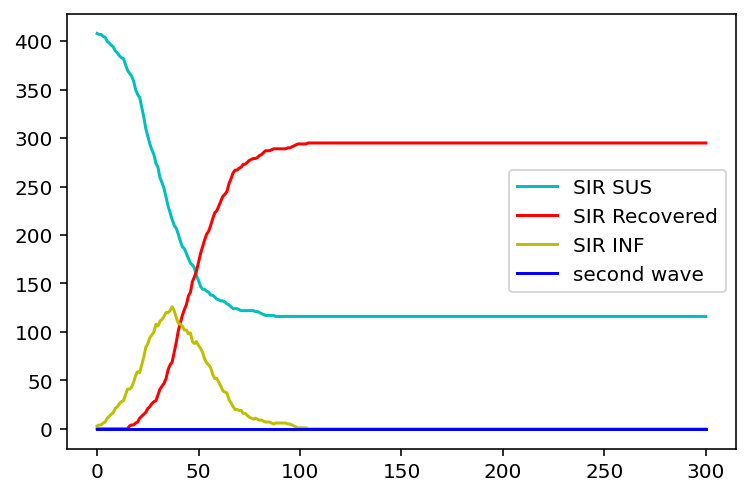

In [216]:
plt.plot(range(len(suspectedlist)),suspectedlist,"c",label="SIR SUS")
plt.plot(range(len(suspectedlist)),recoverdlist,"r",label="SIR Recovered")
plt.plot(range(len(suspectedlist)),infectedlist,"y",label="SIR INF")
plt.plot(range(len(suspectedlist3)),Secondwave,"b",label="second wave")
plt.legend()
plt.show()